In [1]:
#import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv
csv_path = "data/annual_generation_state.csv"

In [3]:
gen_df = pd.read_csv(csv_path, header = None)

In [4]:
gen_df.head()

,0,1,2,3,4
0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,2015,AK,Total Electric Power Industry,Total,"6,284,937"
2,2015,AK,Total Electric Power Industry,Coal,"667,549"
3,2015,AK,Total Electric Power Industry,Hydroelectric Conventional,"1,568,929"
4,2015,AK,Total Electric Power Industry,Natural Gas,"3,089,713"


In [5]:
gen_df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [6]:
gen_df1 = gen_df[[0, 1, 2, 3, 4]]
print(gen_df1)

          0      1                                        2  \
0      YEAR  STATE                         TYPE OF PRODUCER   
1      2015     AK            Total Electric Power Industry   
2      2015     AK            Total Electric Power Industry   
3      2015     AK            Total Electric Power Industry   
4      2015     AK            Total Electric Power Industry   
...     ...    ...                                      ...   
12578  2020     WY  Electric Generators, Electric Utilities   
12579  2020     WY  Electric Generators, Electric Utilities   
12580  2020     WY  Electric Generators, Electric Utilities   
12581  2020     WY  Electric Generators, Electric Utilities   
12582  2020     WY  Electric Generators, Electric Utilities   

                                3                           4  
0                   ENERGY SOURCE  GENERATION (Megawatthours)  
1                           Total                   6,284,937  
2                            Coal                  

In [7]:
true_header = new_header = gen_df1.iloc[0]
gen_df1 = gen_df1[1:]
gen_df1.columns = true_header
gen_df1.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,2015,AK,Total Electric Power Industry,Total,"6,284,937"
2,2015,AK,Total Electric Power Industry,Coal,"667,549"
3,2015,AK,Total Electric Power Industry,Hydroelectric Conventional,"1,568,929"
4,2015,AK,Total Electric Power Industry,Natural Gas,"3,089,713"
5,2015,AK,Total Electric Power Industry,Other,"-2,407"


In [8]:
gen_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12582 entries, 1 to 12582
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        12582 non-null  object
 1   STATE                       12582 non-null  object
 2   TYPE OF PRODUCER            12582 non-null  object
 3   ENERGY SOURCE               12582 non-null  object
 4   GENERATION (Megawatthours)  12581 non-null  object
dtypes: object(5)
memory usage: 491.6+ KB


In [9]:
gen_df1 = gen_df1.dropna(how="any")
gen_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12581 entries, 1 to 12582
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        12581 non-null  object
 1   STATE                       12581 non-null  object
 2   TYPE OF PRODUCER            12581 non-null  object
 3   ENERGY SOURCE               12581 non-null  object
 4   GENERATION (Megawatthours)  12581 non-null  object
dtypes: object(5)
memory usage: 589.7+ KB


In [10]:
gen_df1 = gen_df1.rename(columns={"GENERATION (Megawatthours)": "GENERATION"})
gen_df1.columns

Index(['YEAR', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE', 'GENERATION'], dtype='object', name=0)

In [11]:
gen_df1["GENERATION"] = gen_df1["GENERATION"].str.replace(",", "")
gen_df1["GENERATION"]

1         6284937
2          667549
3         1568929
4         3089713
5           -2407
           ...   
12578    32361811
12579     1075863
12580      647464
12581       44556
12582     2563506
Name: GENERATION, Length: 12581, dtype: object

In [12]:
gen_df1["GENERATION"] = gen_df1["GENERATION"].astype("int64")

In [13]:
#Create data frame to review national energy sources. 
USgen_df = gen_df1[(gen_df1.STATE == "US-Total")]
#Create data frameA to review state energy sources. 
TXgen_df = gen_df1[(gen_df1.STATE == "TX")]
AZgen_df = gen_df1[(gen_df1.STATE == "AZ")] 
FLgen_df = gen_df1[(gen_df1.STATE == "FL")] 
WAgen_df = gen_df1[(gen_df1.STATE == "WA")] 
print(WAgen_df)
VTgen_df = gen_df1[(gen_df1.STATE == "VT")]
KYgen_df = gen_df1[(gen_df1.STATE == "KY")] 

0      YEAR STATE                         TYPE OF PRODUCER  \
1896   2015    WA            Total Electric Power Industry   
1897   2015    WA            Total Electric Power Industry   
1898   2015    WA            Total Electric Power Industry   
1899   2015    WA            Total Electric Power Industry   
1900   2015    WA            Total Electric Power Industry   
...     ...   ...                                      ...   
12470  2020    WA  Electric Generators, Electric Utilities   
12471  2020    WA  Electric Generators, Electric Utilities   
12472  2020    WA  Electric Generators, Electric Utilities   
12473  2020    WA  Electric Generators, Electric Utilities   
12474  2020    WA  Electric Generators, Electric Utilities   

0                       ENERGY SOURCE  GENERATION  
1896                            Total   109287458  
1897                             Coal     5051915  
1898                   Pumped Storage       40021  
1899       Hydroelectric Conventional    734049

In [14]:
UStot_df = USgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_UStot_df = UStot_df[UStot_df["ENERGY SOURCE"].str.contains("Total")==False]
fil_UStot_df.info()
fil_UStot_df

#Create filtered state data frames (TX, AZ, FL, WA, VT, KY)
TXtot_df = TXgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_TXtot_df = TXtot_df[TXtot_df["ENERGY SOURCE"].str.contains("Total")==False]

AZtot_df = AZgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_AZtot_df = AZtot_df[AZtot_df["ENERGY SOURCE"].str.contains("Total")==False]
print(fil_AZtot_df["ENERGY SOURCE"])

FLtot_df = FLgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_FLtot_df = FLtot_df[FLtot_df["ENERGY SOURCE"].str.contains("Total")==False]

WAtot_df = WAgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_WAtot_df = WAtot_df[WAtot_df["ENERGY SOURCE"].str.contains("Total")==False]

VTtot_df = VTgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_VTtot_df = VTtot_df[VTtot_df["ENERGY SOURCE"].str.contains("Total")==False]

KYtot_df = KYgen_df[["YEAR", "ENERGY SOURCE", "GENERATION"]]
fil_KYtot_df = KYtot_df[KYtot_df["ENERGY SOURCE"].str.contains("Total")==False]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 1714 to 12313
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YEAR           404 non-null    object
 1   ENERGY SOURCE  404 non-null    object
 2   GENERATION     404 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.6+ KB
106                                Coal
107                      Pumped Storage
108          Hydroelectric Conventional
109                         Natural Gas
110                             Nuclear
                      ...              
10595                           Nuclear
10596                             Other
10597                         Petroleum
10598    Solar Thermal and Photovoltaic
10599                     Other Biomass
Name: ENERGY SOURCE, Length: 179, dtype: object


In [15]:
#Overall national data from 2015 50 2020 
USgentot_df = UStot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()
USgentot_df = USgentot_df.drop(["Pumped Storage"])
()
print(USgentot_df)

pctrenew = (USgentot_df.loc[["Geothermal", 
                        "Hydroelectric Conventional", 
                        "Solar Thermal and Photovoltaic", 
                        "Wind", "Wood and Wood Derived Fuels"]].sum())/(USgentot_df["Total"])*100
pctnon = (USgentot_df.loc[["Coal", 
                        "Natural Gas", 
                        "Nuclear", 
                        "Other", "Other Gases", "Petroleum"]].sum())/(USgentot_df["Total"])*100

pctdata =[pctrenew, pctnon]
pctdata 
pctlabels = ["Renewable", "Non-Renewable"]
pctlabels
pctexplode = (0.1, 0.0)


USgentot_df=USgentot_df.to_frame() #turn series to dataframe

Other_Sources = USgentot_df.loc[['Wood and Wood Derived Fuels','Petroleum','Other Gases' #add all small energy sources
                                                 ,'Other Biomass','Other','Geothermal']].sum()
Other_Sources.name='All Other Sources'
## Assign sum of all other sources of DataFrame as a new Row
USgentot_df = USgentot_df.append(Other_Sources.transpose())
USgentot_df = USgentot_df.drop(['Wood and Wood Derived Fuels','Petroleum','Other Gases'
                                                 ,'Other Biomass','Other','Geothermal','Total']) #drop all small one
USgentot_df
data =USgentot_df['GENERATION']
data
labels = USgentot_df.index
labels
explode = (0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0)


ENERGY SOURCE
Coal                              13370438348
Geothermal                          189999408
Hydroelectric Conventional         3365793565
Natural Gas                       17397613928
Nuclear                            9628388124
Other                               159623570
Other Biomass                       246957013
Other Gases                         152530834
Petroleum                           269501772
Solar Thermal and Photovoltaic      678389482
Total                             49026117792
Wind                               3157003583
Wood and Wood Derived Fuels         479395469
Name: GENERATION, dtype: int64


C:\Users\nhle9\AppData\Local\Temp\ipykernel_20824\3998522656.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  USgentot_df = USgentot_df.append(Other_Sources.transpose())


In [16]:
TXgentot_df = TXtot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()
TXgentot_df.info

TXpctrenew = (TXgentot_df.loc[[
                        "Hydroelectric Conventional", 
                        "Solar Thermal and Photovoltaic", 
                        "Wind", "Wood and Wood Derived Fuels"]].sum())/(TXgentot_df["Total"])*100
TXpctnon = (TXgentot_df.loc[["Coal", 
                        "Natural Gas", 
                        "Nuclear", 
                        "Other", "Other Gases", "Petroleum"]].sum())/(TXgentot_df["Total"])*100

TXpctdata =[TXpctrenew, TXpctnon]
TXpctdata 
TXpctlabels = ["Renewable", "Non-Renewable"]
TXpctlabels
TXpctexplode = (0.1, 0.0)

#turn series to dataframe
TXgentot_df=TXgentot_df.to_frame()

Other_Sources = TXgentot_df.loc[['Wood and Wood Derived Fuels','Petroleum','Other Gases' #add all small energy sources
                                                 ,'Other Biomass','Other']].sum()
Other_Sources.name ='All Other Sources'

## Assign sum of all other sources of DataFrame as a new Row
TXgentot_df = TXgentot_df.append(Other_Sources.transpose())
TXgentot_df = TXgentot_df.drop(['Wood and Wood Derived Fuels','Petroleum','Other Gases'
                                                 ,'Other Biomass','Other','Total']) #drop all small one
TXgentot_df

TXdata = TXgentot_df['GENERATION']
TXdata
TXlabels = TXgentot_df.index
TXlabels


C:\Users\nhle9\AppData\Local\Temp\ipykernel_20824\884821579.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TXgentot_df = TXgentot_df.append(Other_Sources.transpose())


Index(['Coal', 'Hydroelectric Conventional', 'Natural Gas', 'Nuclear',
       'Solar Thermal and Photovoltaic', 'Wind', 'All Other Sources'],
      dtype='object', name='ENERGY SOURCE')

In [17]:
AZgentot_df = AZtot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()
AZgentot_df = AZgentot_df.drop(["Pumped Storage"])
()

AZpctrenew = (AZgentot_df.loc[[
                        "Hydroelectric Conventional", 
                        "Solar Thermal and Photovoltaic", 
                        "Wind", "Wood and Wood Derived Fuels"]].sum())/(AZgentot_df["Total"])*100
AZpctnon = (AZgentot_df.loc[["Coal", 
                        "Natural Gas", 
                        "Nuclear", 
                        "Other", "Petroleum"]].sum())/(AZgentot_df["Total"])*100

AZpctdata =[AZpctrenew, AZpctnon]
AZpctdata 
AZpctlabels = ["Renewable", "Non-Renewable"]
AZpctlabels
AZpctexplode = (0.1, 0.0)

AZgentot_df=AZgentot_df.to_frame() #turn series to dataframe



Other_Sources = AZgentot_df.loc[['Wood and Wood Derived Fuels','Petroleum', #add all small energy sources
                                                 'Other Biomass','Other']].sum()
Other_Sources.name ='All Other Sources'

## Assign sum of all other sources of DataFrame as a new Row
AZgentot_df = AZgentot_df.append(Other_Sources.transpose())
AZgentot_df = AZgentot_df.drop(['Wood and Wood Derived Fuels','Petroleum'
                                                 ,'Other Biomass','Other','Total']) #drop all small one
AZgentot_df
AZgentot_df
AZdata =AZgentot_df['GENERATION']
AZdata
AZlabels = AZgentot_df.index
AZlabels

C:\Users\nhle9\AppData\Local\Temp\ipykernel_20824\2302324322.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AZgentot_df = AZgentot_df.append(Other_Sources.transpose())


Index(['Coal', 'Hydroelectric Conventional', 'Natural Gas', 'Nuclear',
       'Solar Thermal and Photovoltaic', 'Wind', 'All Other Sources'],
      dtype='object', name='ENERGY SOURCE')

In [18]:
FLgentot_df = FLtot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()


FLgentot_df=FLgentot_df.to_frame() #turn series to dataframe

Other_Sources = FLgentot_df.loc[['Wood and Wood Derived Fuels','Petroleum','Other Gases' #add all small energy sources
                                                 ,'Other Biomass','Other']].sum()
Other_Sources.name='All Other Sources'
## Assign sum of all other sources of DataFrame as a new Row
FLgentot_df = FLgentot_df.append(Other_Sources.transpose())
FLgentot_df = FLgentot_df.drop(['Wood and Wood Derived Fuels','Petroleum','Other Gases'
                                                 ,'Other Biomass','Other','Total']) #drop all small one
FLgentot_df
FLdata =FLgentot_df['GENERATION']
FLdata
FLlabels = FLgentot_df.index
FLlabels

C:\Users\nhle9\AppData\Local\Temp\ipykernel_20824\3798212838.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FLgentot_df = FLgentot_df.append(Other_Sources.transpose())


Index(['Coal', 'Hydroelectric Conventional', 'Natural Gas', 'Nuclear',
       'Solar Thermal and Photovoltaic', 'All Other Sources'],
      dtype='object', name='ENERGY SOURCE')

In [19]:
#Overall national data from 2015 50 2020 
WAgentot_df = WAtot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()

WAgentot_df=WAgentot_df.to_frame() #turn series to dataframe

Other_Sources = WAgentot_df.loc[['Pumped Storage','Wood and Wood Derived Fuels','Petroleum','Other Gases' #add all small energy sources
                                                 ,'Other Biomass','Other']].sum()
Other_Sources.name='All Other Sources'

## Assign sum of all other sources of DataFrame as a new Row
WAgentot_df = WAgentot_df.append(Other_Sources.transpose())
WAgentot_df = WAgentot_df.drop(['Wood and Wood Derived Fuels','Petroleum','Other Gases'
                                                 ,'Other Biomass','Other','Total']) #drop all small one
WAgentot_df
WAdata =WAgentot_df['GENERATION']
WAdata
WAlabels = WAgentot_df.index
WAlabels

C:\Users\nhle9\AppData\Local\Temp\ipykernel_20824\155223458.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  WAgentot_df = WAgentot_df.append(Other_Sources.transpose())


Index(['Coal', 'Hydroelectric Conventional', 'Natural Gas', 'Nuclear',
       'Pumped Storage', 'Solar Thermal and Photovoltaic', 'Wind',
       'All Other Sources'],
      dtype='object', name='ENERGY SOURCE')

In [20]:
VTgentot_df = VTtot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()

VTpctrenew = (VTgentot_df.loc[[ 
                        "Hydroelectric Conventional", 
                        "Solar Thermal and Photovoltaic", 
                        "Wind", "Wood and Wood Derived Fuels"]].sum())/(VTgentot_df["Total"])*100
VTpctnon = (VTgentot_df.loc[[ 
                        "Natural Gas", 
                        ]].sum())/(VTgentot_df["Total"])*100

VTpctdata =[VTpctrenew, VTpctnon]
VTpctdata 
VTpctlabels = ["Renewable", "Non-Renewable"]
VTpctlabels
VTpctexplode = (0.1, 0.0)

VTgentot_df=VTgentot_df.to_frame() #turn series to dataframe

Other_Sources = VTgentot_df.loc[['Wood and Wood Derived Fuels','Petroleum' #add all small energy sources
                                                 ,'Other Biomass','Other']].sum()
Other_Sources.name='All Other Sources'
## Assign sum of all other sources of DataFrame as a new Row
VTgentot_df = VTgentot_df.append(Other_Sources.transpose())
VTgentot_df = VTgentot_df.drop(['Wood and Wood Derived Fuels','Petroleum',
                                                 'Other Biomass','Other','Total']) #drop all small one
VTgentot_df
VTdata =VTgentot_df['GENERATION']
VTdata
VTlabels = VTgentot_df.index
VTlabels

C:\Users\nhle9\AppData\Local\Temp\ipykernel_20824\2508461110.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  VTgentot_df = VTgentot_df.append(Other_Sources.transpose())


Index(['Hydroelectric Conventional', 'Natural Gas',
       'Solar Thermal and Photovoltaic', 'Wind', 'All Other Sources'],
      dtype='object', name='ENERGY SOURCE')

In [21]:
KYgentot_df = KYtot_df.groupby(["ENERGY SOURCE"])["GENERATION"].sum()


KYgentot_df=KYgentot_df.to_frame() #turn series to dataframe

Other_Sources = KYgentot_df.loc[['Wood and Wood Derived Fuels','Petroleum', #add all small energy sources
                                                 'Other Biomass','Other',]].sum()
Other_Sources.name='All Other Sources'
## Assign sum of all other sources of DataFrame as a new Row
KYgentot_df = KYgentot_df.append(Other_Sources.transpose())
KYgentot_df = KYgentot_df.drop(['Wood and Wood Derived Fuels','Petroleum'
                                                 ,'Other Biomass','Other','Total']) #drop all small one
KYgentot_df
KYdata =KYgentot_df['GENERATION']
KYdata
KYlabels = KYgentot_df.index
KYlabels

C:\Users\nhle9\AppData\Local\Temp\ipykernel_20824\3400815659.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  KYgentot_df = KYgentot_df.append(Other_Sources.transpose())


Index(['Coal', 'Hydroelectric Conventional', 'Natural Gas',
       'Solar Thermal and Photovoltaic', 'All Other Sources'],
      dtype='object', name='ENERGY SOURCE')

In [22]:
AnnualEmissionsperVehicle={'Arizona (AZ)': {'All Electric':3313, "Plug-in Hybrid":5389,'Hybrid':6258,'Gasoline':11435},
                    
                           'Texas (TX)' :    {'All Electric':4035, "Plug-in Hybrid":5844,'Hybrid':6258,'Gasoline':11435},
                           'Florida (FL)':   {'All Electric':4131, "Plug-in Hybrid":5905,'Hybrid':6258,'Gasoline':11435},
                           'Kentucky (KY)':  {'All Electric':7919, "Plug-in Hybrid":8294,'Hybrid':6258,'Gasoline':11435},
                           'Vermont (VT)' :  {'All Electric':0,    "Plug-in Hybrid":3302,'Hybrid':6258,'Gasoline':11435},
                           'Washington (WA)':{'All Electric':940,  "Plug-in Hybrid":3892,'Hybrid':6258,'Gasoline':11435},
                           'Wisconsin (WI)' :{'All Electric':5685,  "Plug-in Hybrid":6885,'Hybrid':6258,'Gasoline':11435}}
EmissonsPerVehicle=pd.DataFrame(AnnualEmissionsperVehicle)
EmissonsPerVehicle.columns

Index(['Arizona (AZ)', 'Texas (TX)', 'Florida (FL)', 'Kentucky (KY)',
       'Vermont (VT)', 'Washington (WA)', 'Wisconsin (WI)'],
      dtype='object')

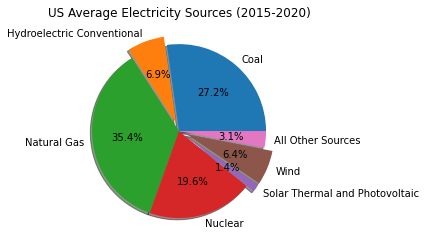

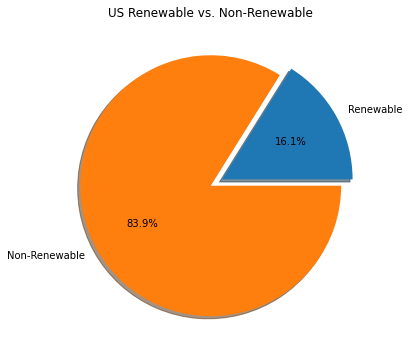

In [23]:
#National plot visualization
plt.pie(data,explode=explode,autopct='%1.1f%%',startangle=0,labels = labels, shadow=True)
plt.title(label ="US Average Electricity Sources (2015-2020)")
plt.savefig('output/US Average Electricity Sources (2015-2020).jpeg')
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.show()


plt.pie(pctdata,explode=pctexplode,autopct='%1.1f%%',startangle=0,labels = pctlabels, shadow=True)
plt.title(label ="US Renewable vs. Non-Renewable")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/US Renewable vs. Non-Renewable.jpeg')
plt.show()

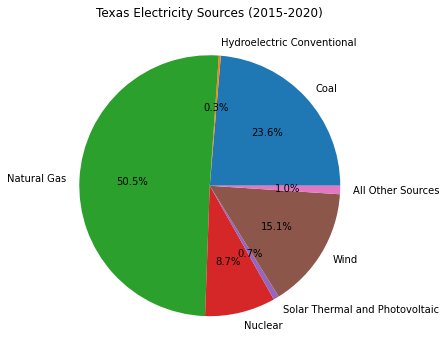

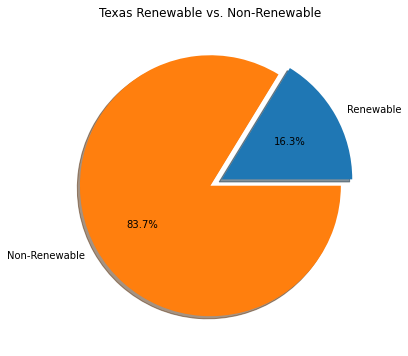

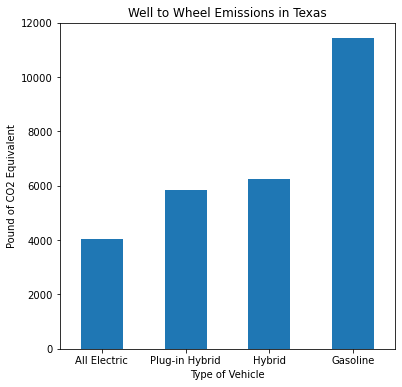

In [24]:
#Texas plot visualization
#first pie
plt.pie(TXdata, autopct='%1.1f%%',startangle=0,labels = TXlabels)
plt.title(label ="Texas Electricity Sources (2015-2020)")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Texas Electricity Sources (2015-2020).jpeg')
plt.show()

#second pie
plt.pie(TXpctdata,explode=TXpctexplode,autopct='%1.1f%%',startangle=0,labels = TXpctlabels, shadow=True)
plt.title(label ="Texas Renewable vs. Non-Renewable")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Texas Renewable vs. Non-Renewable.jpeg')
plt.show()

#bar 
ax = EmissonsPerVehicle['Texas (TX)'].plot.bar(rot=0)
plt.xlabel("Type of Vehicle")
plt.ylabel('Pound of CO2 Equivalent')
plt.title('Well to Wheel Emissions in Texas')
plt.savefig('output/Texas Well to Wheel Emissions.jpeg')
plt.show()



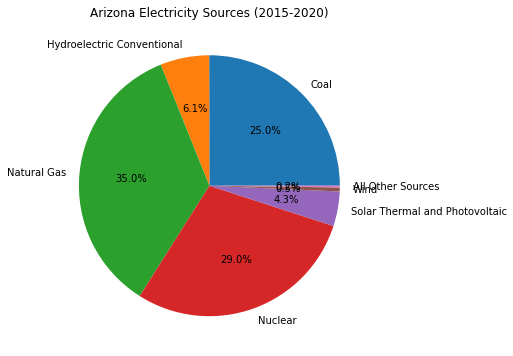

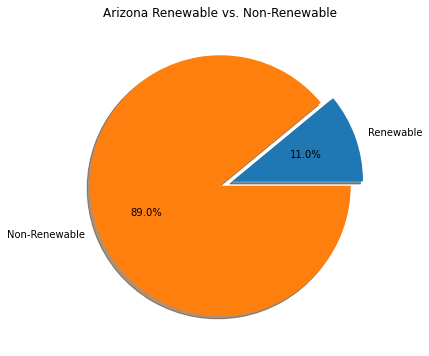

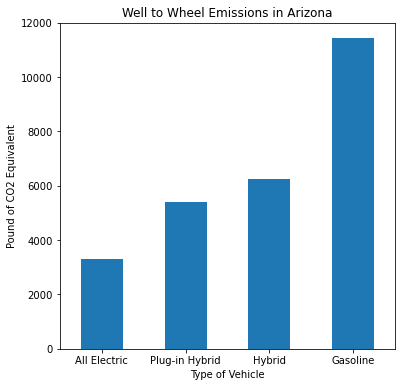

In [25]:
#plot visualization
#first pie
plt.pie(AZdata, autopct='%1.1f%%',startangle=0,labels = AZlabels)
plt.title(label ="Arizona Electricity Sources (2015-2020)")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Arizona Electricity Sources (2015-2020).jpeg')
plt.show()

#second pie
plt.pie(AZpctdata,explode=AZpctexplode,autopct='%1.1f%%',startangle=0,labels = AZpctlabels, shadow=True)
plt.title(label ="Arizona Renewable vs. Non-Renewable")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Arizona Renewable vs. Non-Renewable.jpeg')
plt.show()

ax = EmissonsPerVehicle['Arizona (AZ)'].plot.bar(rot=0)
plt.xlabel("Type of Vehicle")
plt.ylabel('Pound of CO2 Equivalent')
plt.title('Well to Wheel Emissions in Arizona')
plt.savefig('output/Arizona Well to Wheel Emissions.jpeg')
plt.show()

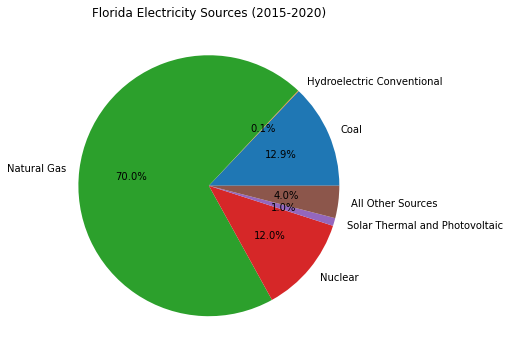

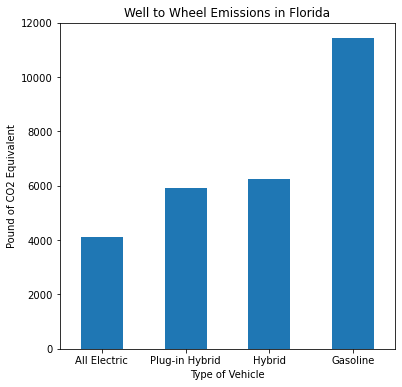

In [26]:
#FL plot visualization
plt.pie(FLdata, autopct='%1.1f%%',startangle=0,labels = FLlabels)
plt.title(label ="Florida Electricity Sources (2015-2020)")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Florida Electricity Sources (2015-2020).jpeg')
plt.show()

#bar chart
ax = EmissonsPerVehicle['Florida (FL)'].plot.bar(rot=0)
plt.xlabel("Type of Vehicle")
plt.ylabel('Pound of CO2 Equivalent')
plt.title('Well to Wheel Emissions in Florida')
plt.savefig('output/Florida Well to Wheel Emissions.jpeg')
plt.show()

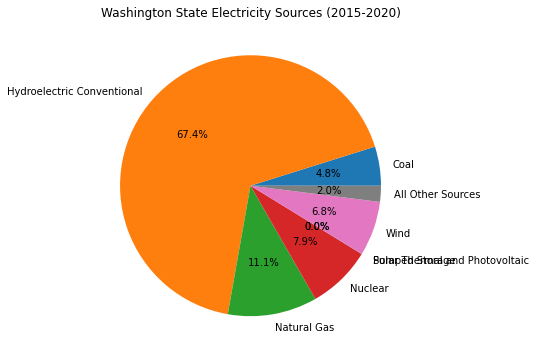

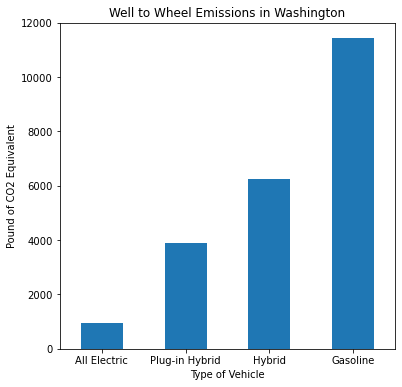

In [27]:
#Washington plot visualization
plt.pie(WAdata,autopct='%1.1f%%',startangle=0,labels = WAlabels)
plt.title(label ="Washington State Electricity Sources (2015-2020)")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Washington State Electricity Sources (2015-2020).jpeg')
plt.show()
#bar graph
ax = EmissonsPerVehicle['Washington (WA)'].plot.bar(rot=0)
plt.xlabel("Type of Vehicle")
plt.ylabel('Pound of CO2 Equivalent')
plt.title('Well to Wheel Emissions in Washington')
plt.savefig('output/Washington Well to Wheel Emissions.jpeg')
plt.show()

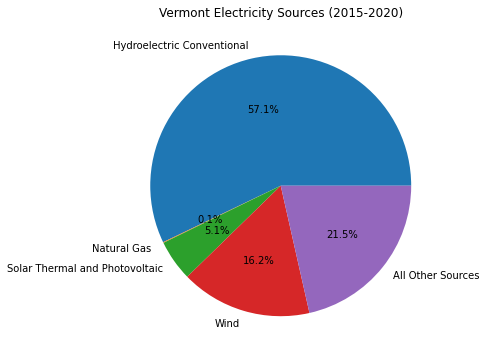

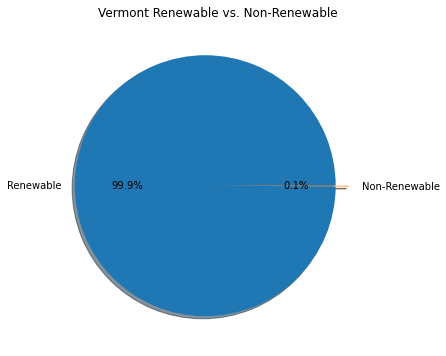

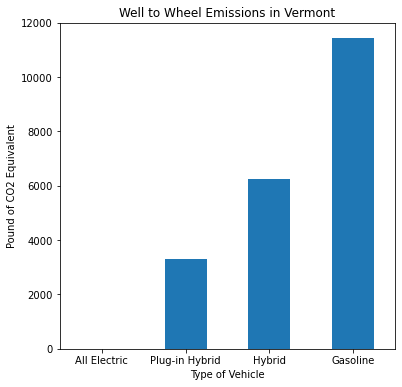

In [28]:
#Vermont plot visualization
plt.pie(VTdata,autopct='%1.1f%%',startangle=0,labels = VTlabels)
plt.title(label ="Vermont Electricity Sources (2015-2020)")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Vermont Electricity Sources (2015-2020).jpeg')
plt.show()

#second pie
plt.pie(VTpctdata,explode=VTpctexplode,autopct='%1.1f%%',startangle=0,labels = VTpctlabels, shadow=True)
plt.title(label ="Vermont Renewable vs. Non-Renewable")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Vermont Renewable vs. Non-Renewable.jpeg')
plt.show()
#bar chart
ax = EmissonsPerVehicle['Vermont (VT)'].plot.bar(rot=0)
plt.xlabel("Type of Vehicle")
plt.ylabel('Pound of CO2 Equivalent')
plt.title('Well to Wheel Emissions in Vermont')
plt.savefig('output/Vermont Well to Wheel Emissions.jpeg')
plt.show()

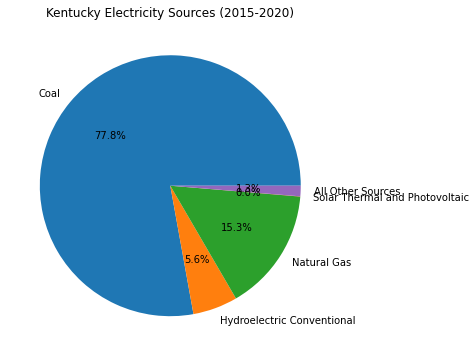

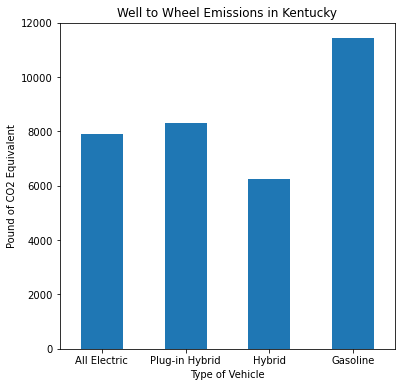

In [29]:
#Kentucky plot visualization
plt.pie(KYdata,autopct='%1.1f%%',startangle=0,labels = KYlabels)
plt.title(label ="Kentucky Electricity Sources (2015-2020)")
plt.rcParams['figure.figsize']=(6,6) # Change plot size
plt.savefig('output/Kentucky Electricity Sources (2015-2020).jpeg')
plt.show()


ax = EmissonsPerVehicle['Kentucky (KY)'].plot.bar(rot=0)
plt.xlabel("Type of Vehicle")
plt.ylabel('Pound of CO2 Equivalent')
plt.title('Well to Wheel Emissions in Kentucky')
plt.savefig('output/Kentucky Well to Wheel Emissions.jpeg')
plt.show()